In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 110 entries, fb_id to attacking_touches
dtypes: float64(101), int64(1), object(8)
memory usage: 606.0+ KB


In [46]:
def_stats = df.loc[df['Nineties']>1][[ 'Nineties','pAdj_Total_tackles', 'pAdj_Tackles_Won','Aerial_win_pct',
#                                       'pAdj_Tackles_Def_3rd',
#        'pAdj_Tackles_Mid_3rd', 'pAdj_Tackles_Att_3rd',
       'pAdj_Num_Dribblers_tackled', 'pAdj_Num_Dribbled_past',
#        'pAdj_total_pressing', 'pAdj_Won_ball_5_sec',  'pAdj_Blocks',
#        'pAdj_Interceptions', 'pAdj_Clearences',
# #        'pAdj_Yellow_cards', 
#        'pAdj_Fouls', 'pAdj_def_interceptions',
# #         'pAdj_PK_conceded',
#        'pAdj_Recoveries', 'pAdj_Aerial_Duels_lost',
#        'True_tackle_pct', 'pAdj_Tackle_int_blocks'
                                     ]]

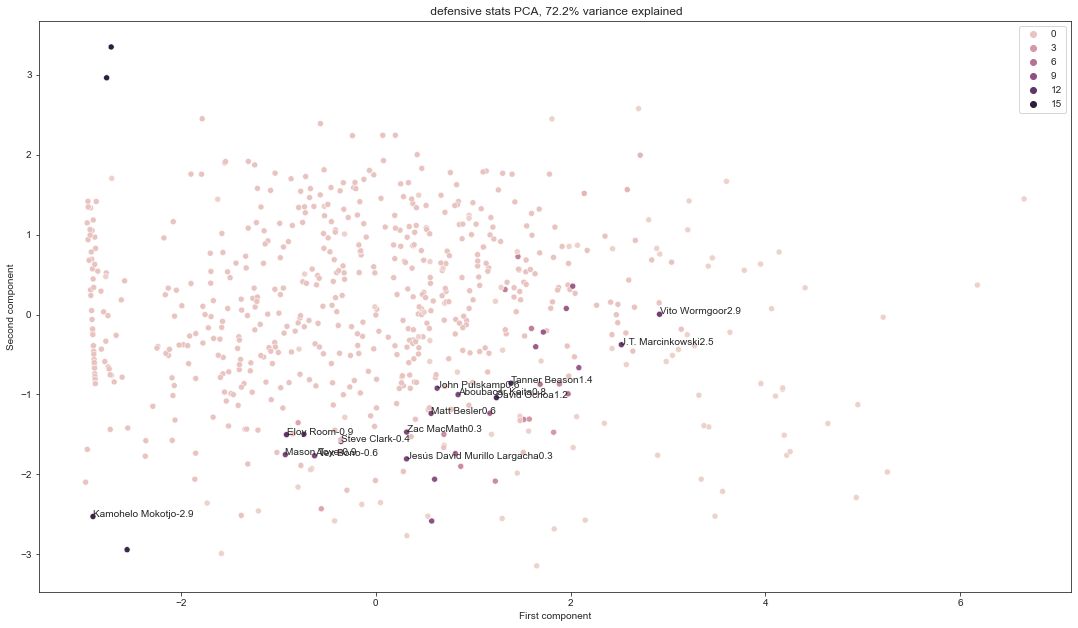

In [72]:

scaler = StandardScaler()
def_scaled = scaler.fit_transform(def_stats)
# cluster the data into five clusters
dbscan = DBSCAN(eps=.923, min_samples = 2)
clusters = dbscan.fit_predict(def_scaled)

def_pca = PCA().fit(def_scaled)
def_pca_x = def_pca.transform(def_scaled)
def_pca_df = pd.DataFrame(def_pca_x[:,:2])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = def_pca_x[:,0:2]
x = def_pca_x[:, 0]
y = def_pca_x[:, 1]
# p = names
c = clusters


pc_var = 100 * def_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=def_pca_df, x =x, y=y,hue=c,cmap="plasma",
#                     palette=["C0", "C1", "C2","C3", "k"], 
                    ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' defensive stats PCA, {pc_var:.1f}% variance explained')
# plot the cluster assignments
# plt.scatter(def_stats.iloc[:, 1], def_stats.iloc[:, 3], c=clusters, cmap="plasma")
# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")

p=df.loc[df['Nineties']>5]['player_name']
for p,c, x, y in zip(p,c, x, y):
    if c > 9:
        plt.annotate(p+str(round(x,1)), (x,y))
        
#     if x >4.3:
#         plt.annotate(p, (x, y))
#     if y> 2:
#         plt.annotate(p+str(round(x,1)), (x,y))
plt.show()

In [61]:
dfc = pd.DataFrame({'cluster':clusters,'name':df.loc[df['Nineties']>1]['player_name'],
                    'Position':df.loc[df['Nineties']>1]['Position'],
                   'PCA_first_component':def_pca_x[:, 0],
                   'PCA_second_component':def_pca_x[:,1],'Ninties':df.loc[df['Nineties']>1]['Nineties']})

In [65]:
dfc['cluster'].value_counts()

 0     519
-1      94
 10      8
 4       5
 8       5
 5       3
 1       3
 2       3
 6       2
 7       2
 9       2
 3       2
 12      2
 13      2
 14      2
 15      2
 11      2
Name: cluster, dtype: int64

In [66]:
dfc.loc[dfc['cluster']==13]

,cluster,name,Position,PCA_first_component,PCA_second_component,Ninties
478,13,Alvas Powell,DF,1.389376,-0.858531,3.4
538,13,Michael Halliday,DF,1.239532,-1.040073,4.2
